In [5]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [6]:
FW_months = ['201401','201402','201409','201410','201411','201412']
SS_months = ['201403','201404','201405','201406','201407','201408']

SS_files = []
FW_files = []

SS_df = pd.DataFrame()
FW_df = pd.DataFrame()
Year_df = pd.DataFrame()

for SS_month in SS_months:
    SS_path = '~/PUI2015_mmh555/citibikes/%s-citibike-tripdata.csv' % SS_month
    SS_frame = pd.read_csv(SS_path)
    SS_files.append(SS_frame)
SS_df = pd.concat(SS_files, ignore_index=True)

In [7]:
print (len(SS_df.index))

4845225


In [8]:
for FW_month in FW_months:
    FW_path = '~/PUI2015_mmh555/citibikes/%s-citibike-tripdata.csv' % FW_month
    FW_frame = pd.read_csv(FW_path)
    FW_files.append(FW_frame)
FW_df = pd.concat(FW_files, ignore_index=True)

In [9]:
print (len(FW_df.index))

3235991


In [10]:
#So it looks like we have less rides in Fall-Winter. That looks right.

In [12]:
FW_df['age'] = 2015 - FW_df['birth year'].convert_objects(convert_numeric = True)[(FW_df['usertype'] == 'Subscriber')]
SS_df['age'] = 2015 - SS_df['birth year'].convert_objects(convert_numeric = True)[(SS_df['usertype'] == 'Subscriber')]

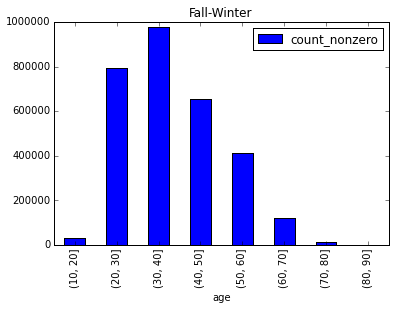

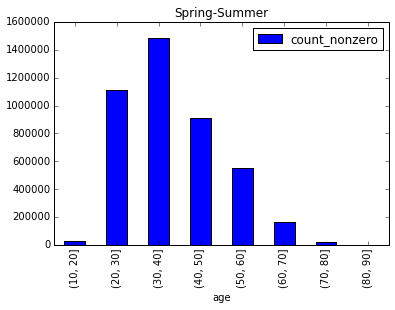

In [13]:
bins = np.arange(10, 99, 10)
FW_df.age.groupby(pd.cut(FW_df.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Fall-Winter")
FW_age_dist = FW_df.age.groupby(pd.cut(FW_df.age, bins)).agg([count_nonzero])
SS_df.age.groupby(pd.cut(SS_df.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Spring-Summer")
SS_age_dist = SS_df.age.groupby(pd.cut(SS_df.age, bins)).agg([count_nonzero])
    

In [14]:
ksW=scipy.stats.kstest(FW_age_dist, 'norm')
ksS=scipy.stats.kstest(SS_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit (1.0, 0.0)
summer, normal fit (1.0, 0.0)


KS Test interpretation: p-value is very low (zero!) so we fail to reject the null hypothesis. These distributions are similar to the normal distribution...?

###Waste of time.

"even if you just replicate it... PLEASE UNDESRTAND IT! or you will have learned nothing and wasted both of our times"

I agree, I have sunk way too much time into these assignments and I have only gotten more confused.